# SVM Model

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv(os.path.join("../NBA_Data/nbaGamesStats.csv"))
df.head()

,ID,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [3]:
target = df["WINorLOSS"]
target_names = ["W", "L"]

In [4]:
data = df.drop(["WINorLOSS","ID","Date","Game","Home","Opponent","Team"], axis=1)
feature_names = data.columns
data.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals_pct,X3PointShots,X3PointShotsAttempted,X3PointShots_pct,FreeThrows,FreeThrowsAttempted,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,102,109,40,80,0.500,13,22,0.591,9,17,...,27,33,0.818,16,48,26,13,9,9,22
1,102,92,35,69,0.507,7,20,0.350,25,33,...,18,21,0.857,11,44,25,5,5,18,26
2,92,94,38,92,0.413,8,25,0.320,8,11,...,27,38,0.711,11,50,25,7,9,19,15
3,119,122,43,93,0.462,13,33,0.394,20,26,...,20,27,0.741,11,51,31,6,7,19,30
4,103,96,33,81,0.407,9,22,0.409,28,36,...,8,11,0.727,13,44,26,2,6,15,29


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 1.000


In [8]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           W       1.00      1.00      1.00      1257
           L       1.00      1.00      1.00      1203

    accuracy                           1.00      2460
   macro avg       1.00      1.00      1.00      2460
weighted avg       1.00      1.00      1.00      2460



# KNN Model

In [9]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [10]:
df = pd.read_csv(os.path.join("../NBA_Data/nbaGamesStats.csv"))
df.head()

,ID,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [11]:
y = df["WINorLOSS"]
target_names = ["W", "L"]

In [12]:
X = df.drop(["WINorLOSS","ID","Date","Game","Home","Opponent","Team"], axis=1)
X.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals_pct,X3PointShots,X3PointShotsAttempted,X3PointShots_pct,FreeThrows,FreeThrowsAttempted,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,102,109,40,80,0.500,13,22,0.591,9,17,...,27,33,0.818,16,48,26,13,9,9,22
1,102,92,35,69,0.507,7,20,0.350,25,33,...,18,21,0.857,11,44,25,5,5,18,26
2,92,94,38,92,0.413,8,25,0.320,8,11,...,27,38,0.711,11,50,25,7,9,19,15
3,119,122,43,93,0.462,13,33,0.394,20,26,...,20,27,0.741,11,51,31,6,7,19,30
4,103,96,33,81,0.407,9,22,0.409,28,36,...,8,11,0.727,13,44,26,2,6,15,29


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.849
k: 3, Train/Test Score: 0.951/0.891
k: 5, Train/Test Score: 0.943/0.897
k: 7, Train/Test Score: 0.942/0.913
k: 9, Train/Test Score: 0.945/0.920
k: 11, Train/Test Score: 0.943/0.920
k: 13, Train/Test Score: 0.944/0.927
k: 15, Train/Test Score: 0.943/0.925
k: 17, Train/Test Score: 0.946/0.932
k: 19, Train/Test Score: 0.948/0.935


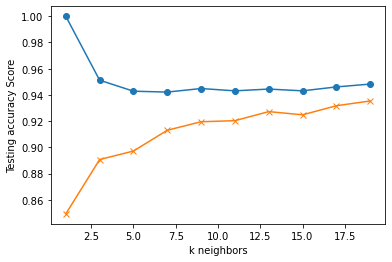

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.927
